# Import modules

In [1]:
import pandas as pd #To read csv files
import numpy as np # To perform operations
import os # to handle files
import matplotlib.pyplot as plt # for data plotting
import seaborn as sns # For simple plotting i.e in a single line

# Loading the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(columns = ['Id']) #drop the id column as we don't need it
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info() #basic info about datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#to display no. of smaples on eaach class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing the dataset

In [7]:
#check for null vlaues
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<Axes: >

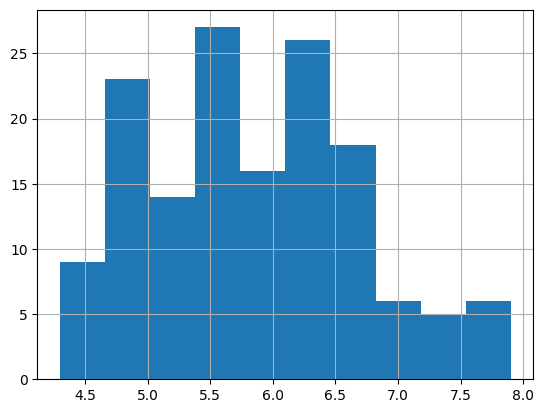

In [8]:
df['SepalLengthCm'].hist()#histogram

In [9]:
# scatterplot
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica' ]

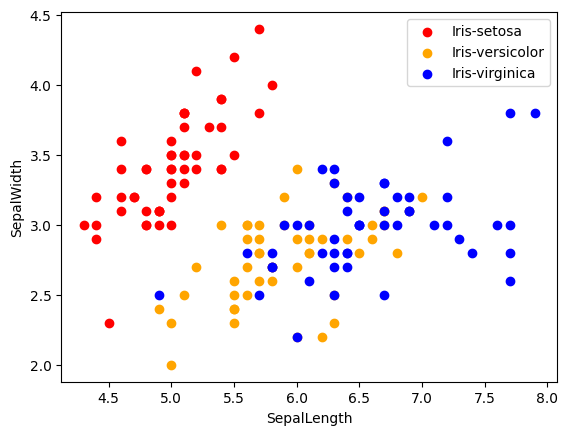

In [10]:
for i in range(3) :
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('SepalLength')#To show labels in x,y plane
plt.ylabel('SepalWidth')
plt.legend()

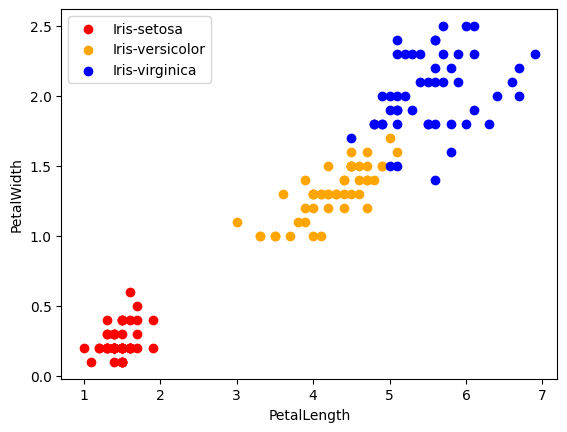

In [11]:
for i in range(3) :
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()

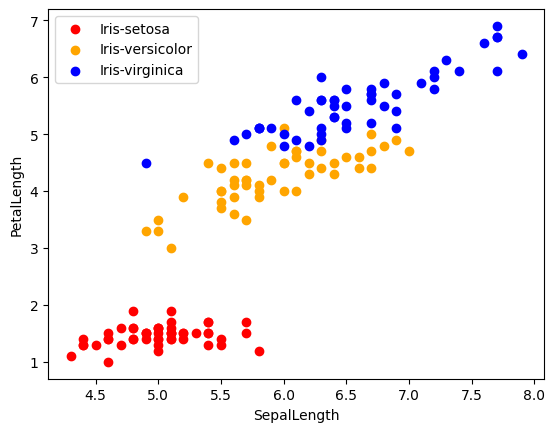

In [12]:
for i in range(3) :
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

# Coorelation Matrix
A correlation matrix is a table showing correlation coeffcients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of-1 to 1. If two varibles have high correlation. we can neglect one variable from those two

# Label Encoder
In machine leaming, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])


In [14]:
#df = df.drop(columns = ['Species'])
df.head()
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

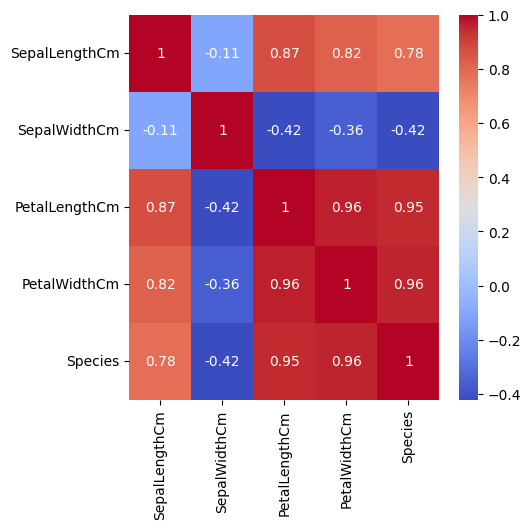

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')
#Red means higher corr, blue means low corr

# Model Training

In [16]:
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30)

In [17]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
#print matric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [20]:
#knn k-nearest neighbours
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier()

In [21]:
# model.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
# print("Accuracy: ",model.score(x_test,y_test)*100)


Accuracy:  95.55555555555556


In [20]:
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777777777777777

In [22]:
from joblib import dump

In [23]:
dump(model,'./../SavedModel/model.joblib')

['./../SavedModel/model.joblib']

In [25]:
# Assuming 'model' is your trained model
feature_names = df.columns.tolist()  # Assuming 'df' is your DataFrame
print(df.columns
     )

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
